In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

49.60068181924137 168.18321614667678
80.32715710493068 -142.51350552183646
-72.19822240550026 -84.95610319502613
78.18167335230231 141.04921461120398
-41.924987474556055 5.216551668667677
26.188451990964737 36.74665247097613
-61.20216278582093 -107.11842044977124
-73.87989956781614 -1.8864577486770884
-62.120963647375405 -178.79999529928932
-19.175297576960816 94.59232925805554
-49.864480840276364 78.28526211638484
-2.5297085943163893 170.7770538051583
-69.80058276057161 -1.1342607198066617
-29.318179911399497 -82.23243066999186
80.80123779110394 6.241893279281015
-53.48607491633799 96.21330664602533
-18.150097581602424 106.49628276167834
-21.150075681385673 20.361063467405984
-9.201523784807506 -170.59056904313664
-30.424021608942546 -19.15850067009518
18.65862152768706 32.41212679062696
-18.513461512572377 38.66713631922835
-81.4666553431581 23.170480958947394
-35.23811543008211 -85.85159560643181
-88.29403278205838 44.287363048757214
-15.468217543095093 -7.309032201774613
-54.023376

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library
import requests

# Import the API key 
from config import weather_api_key

# Import the time library and the dtetime module from the datetime library.
import time
from datetime import datetime

# Build the basic URL for the OpenWeatherMap with your api_key addesd to the URL
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | umm lajj
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | labuhan
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ghanzi
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | marawi
Processing Record 20 of Set 1 | mocuba
Processing 

KeyboardInterrupt: 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
                 



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,37.29,92,100,11.65,RU,2023-01-15 00:02:16
1,Aklavik,68.2191,-135.0107,-14.58,98,100,4.27,CA,2023-01-15 00:03:28
2,Punta Arenas,-53.1500,-70.9167,53.71,58,0,24.16,CL,2023-01-14 23:58:26
3,Cape Town,-33.9258,18.4232,71.38,71,83,14.00,ZA,2023-01-15 00:02:45
4,Umm Lajj,25.0213,37.2685,64.49,59,12,9.46,SA,2023-01-15 00:03:29
5,Hermanus,-34.4187,19.2345,67.80,73,93,13.62,ZA,2023-01-15 00:01:59
6,Vaini,-21.2000,-175.2000,83.14,77,48,7.18,TO,2023-01-15 00:03:30
7,Labuhan,-6.8844,112.2051,79.23,81,100,8.32,ID,2023-01-15 00:03:30
8,Mahebourg,-20.4081,57.7000,78.26,78,96,14.14,MU,2023-01-15 00:03:31
9,Coquimbo,-29.9533,-71.3436,64.94,75,3,6.53,CL,2023-01-15 00:03:31


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2023-01-15 00:02:16,59.7035,30.7861,37.29,92,100,11.65
1,Aklavik,CA,2023-01-15 00:03:28,68.2191,-135.0107,-14.58,98,100,4.27
2,Punta Arenas,CL,2023-01-14 23:58:26,-53.1500,-70.9167,53.71,58,0,24.16
3,Cape Town,ZA,2023-01-15 00:02:45,-33.9258,18.4232,71.38,71,83,14.00
4,Umm Lajj,SA,2023-01-15 00:03:29,25.0213,37.2685,64.49,59,12,9.46
...,...,...,...,...,...,...,...,...,...
130,Vardo,NO,2023-01-15 00:25:43,70.3705,31.1107,19.38,86,93,21.85
131,Beloha,MG,2023-01-15 00:25:43,-25.1667,45.0500,73.99,81,6,12.66
132,Whangarei,NZ,2023-01-15 00:25:44,-35.7317,174.3239,69.37,64,82,8.79
133,Lagos,NG,2023-01-15 00:25:00,6.5833,3.7500,80.92,91,28,3.31


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

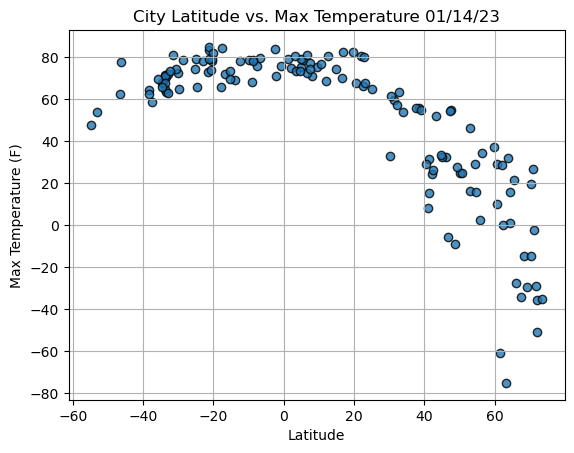

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

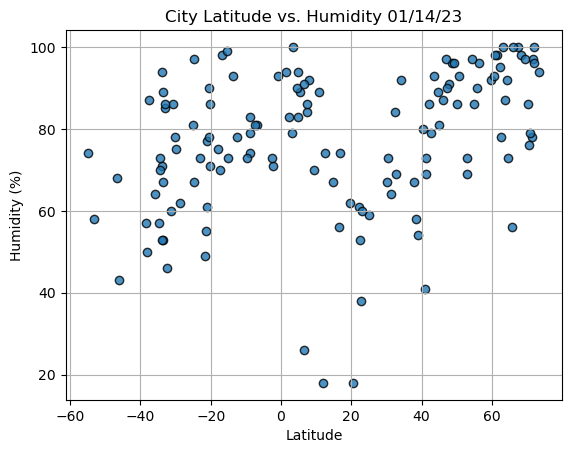

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

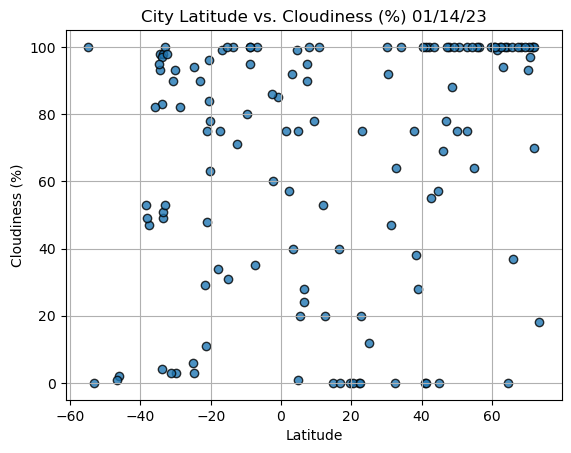

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


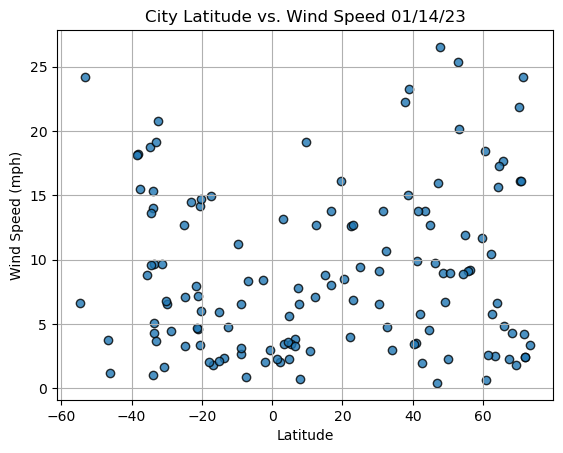

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [24]:
# Create a new DataFrame from a current data frame using the loc method.
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2023-01-14 23:57:53
Lat                        42.097
Lng                      -79.2353
Max Temp                    24.39
Humidity                       86
Cloudiness                    100
Wind Speed                   5.75
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >=0

0       True
1       True
2      False
3      False
4       True
       ...  
130     True
131    False
132    False
133     True
134    False
Name: Lat, Length: 135, dtype: bool

In [28]:
# This returns the DataFrame to all the data fitting criteria.
city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Adding the head() method is only going to show the first 5 rows.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2023-01-15 00:02:16,59.7035,30.7861,37.29,92,100,11.65
1,Aklavik,CA,2023-01-15 00:03:28,68.2191,-135.0107,-14.58,98,100,4.27
4,Umm Lajj,SA,2023-01-15 00:03:29,25.0213,37.2685,64.49,59,12,9.46
13,Jamestown,US,2023-01-14 23:57:53,42.0970,-79.2353,24.39,86,100,5.75
14,Marawi,PH,2023-01-15 00:03:35,7.9986,124.2928,70.99,92,100,0.74


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


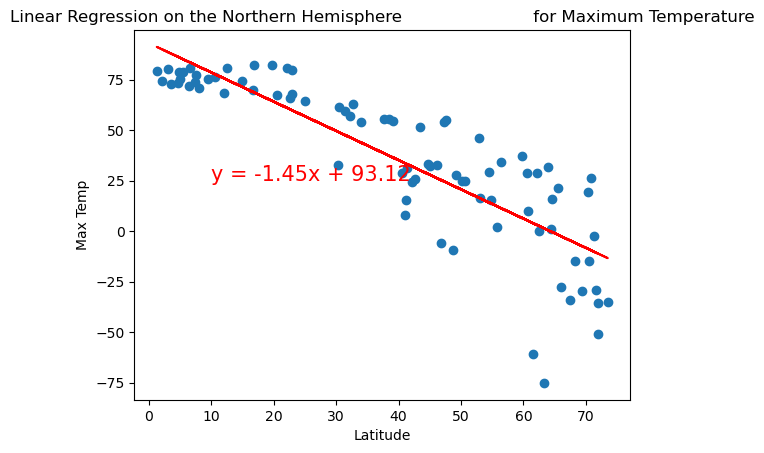

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,25))

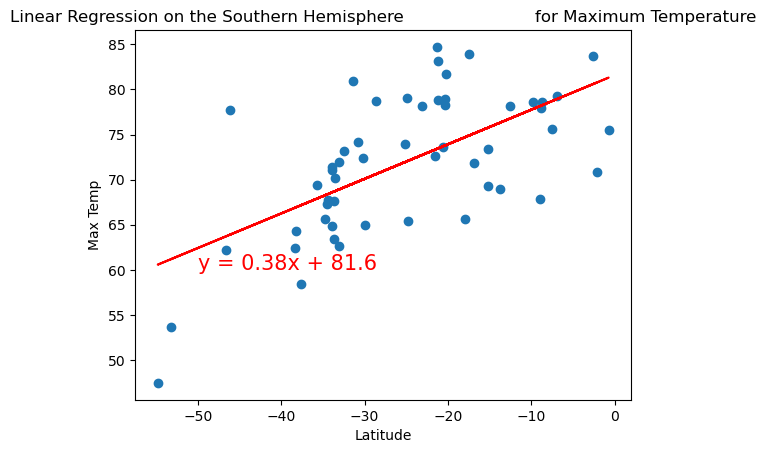

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,60))

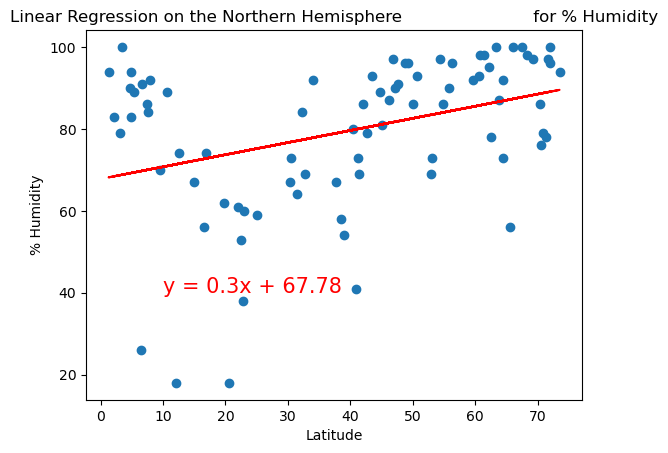

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,40))

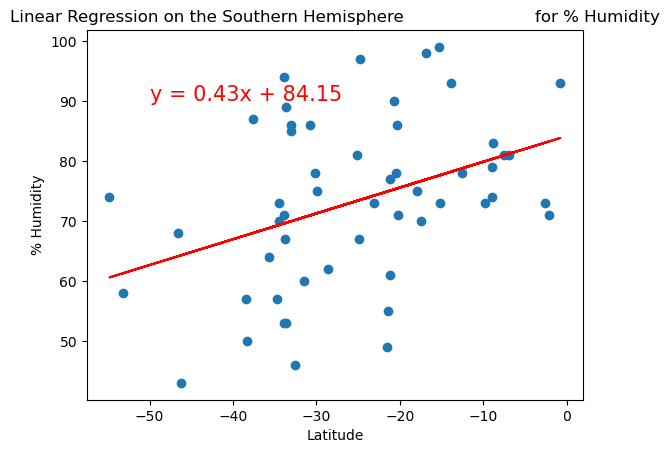

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,90))

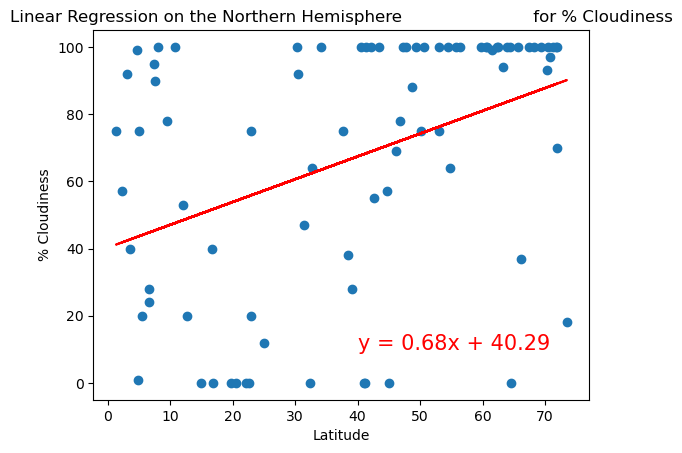

In [45]:
# SKILL DRILL
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

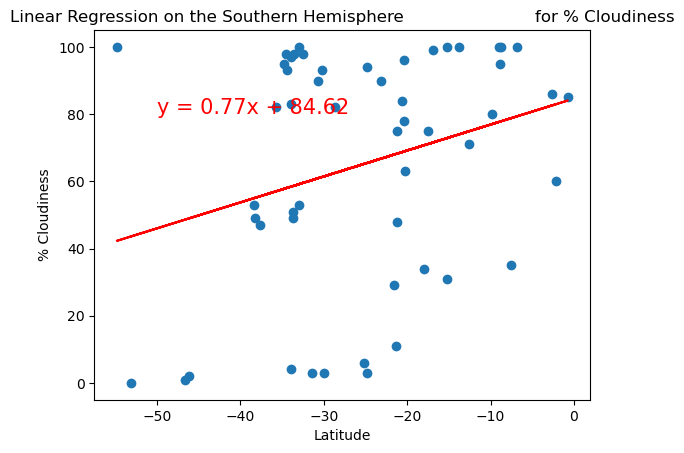

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,80))


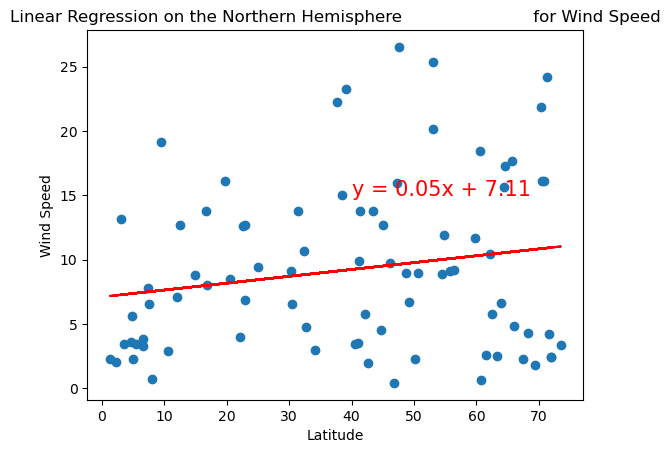

In [61]:
# LINEAR REGRESSION ON THE WIND SPEED
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

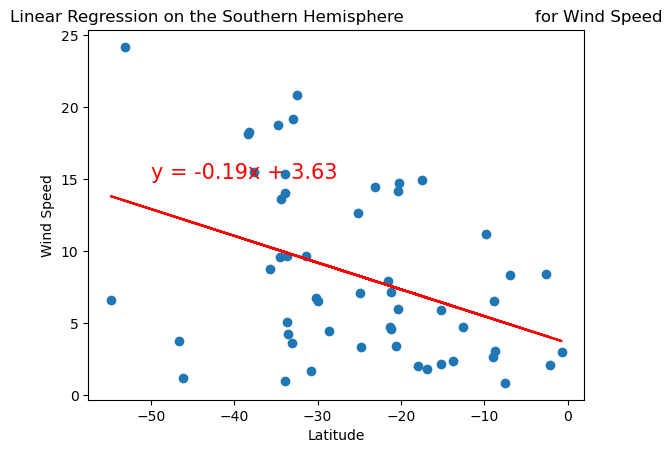

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))